# Evaluate

In [1]:
from PIL import Image
import torch
from torchvision import transforms
from model import EncoderCNN, DecoderRNN
from nlp_utils import clean_sentence
import os
import pickle
import matplotlib.pyplot as plt

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")




In [2]:
# Set the necessary parameters
embed_size = 256  # Assuming it's the same as during training
hidden_size = 512  # Assuming it's the same as during training
vocab_file = "vocab.pkl"  # Assuming the name of the vocabulary file

# Load the vocabulary
with open(os.path.join("./data", vocab_file), "rb") as f:
    vocab = pickle.load(f)

vocab_size = len(vocab)

# Initialize the encoder and decoder.
encoder = EncoderCNN(embed_size)
decoder = DecoderRNN(embed_size, hidden_size, vocab_size)

# Moving models to the appropriate device
encoder.to(device)
decoder.to(device)

# Load the trained weights
encoder_file = "encoder-10.pkl"  
decoder_file = "decoder-10.pkl"  


# Load the encoder model with CPU
encoder_file = os.path.join("./models", encoder_file)
encoder.load_state_dict(torch.load(encoder_file, map_location=device))

# Load the decoder model with CPU
decoder_file = os.path.join("./models", decoder_file)
decoder.load_state_dict(torch.load(decoder_file, map_location=device))


# Set models to evaluation mode
encoder.eval()
decoder.eval()

C:\ProgramData\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DecoderRNN(
  (embed): Embedding(11543, 256)
  (lstm): LSTM(256, 512, batch_first=True)
  (linear): Linear(in_features=512, out_features=11543, bias=True)
)

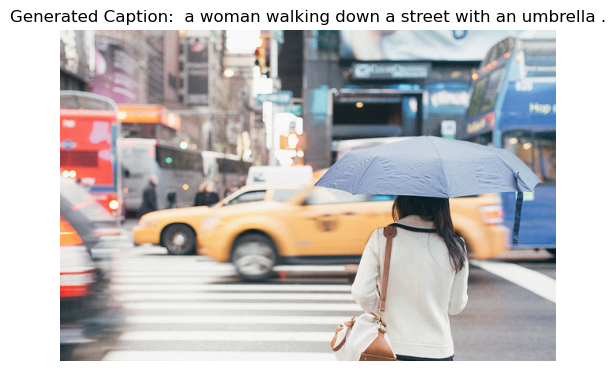

In [4]:
# Load the test image
#test_image_path = "../test.jpg"  
#test_image_path = "../../../Flickr 8k Dataset/RandomImages/R1.jpg"  
test_image_path = "../cocoapi/RandomImages/_Random1.jpg"  
test_image = Image.open(test_image_path).convert("RGB")

# Apply transformations to the test image
transform_test = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

# Preprocess the test image
test_image = transform_test(test_image).unsqueeze(0)  # Add batch dimension

# Move the preprocessed image to the appropriate device
test_image = test_image.to(device)

# Pass the test image through the encoder
with torch.no_grad():
    features = encoder(test_image).unsqueeze(1)

# Generate captions with the decoder
with torch.no_grad():
    output = decoder.sample(features)

# Convert the output into a clean sentence
caption = clean_sentence(output, vocab.idx2word)

# Display the test image with the generated caption
plt.imshow(Image.open(test_image_path))
plt.axis('off')
plt.title('Generated Caption: ' + caption)
plt.show()

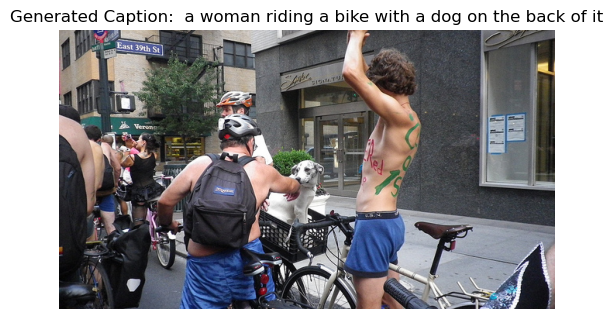

In [5]:
# Load the test image
#test_image_path = "../test.jpg"  
#test_image_path = "../../../Flickr 8k Dataset/RandomImages/R1.jpg"  
test_image_path = "../cocoapi/RandomImages/_Random2.jpg"  
test_image = Image.open(test_image_path).convert("RGB")

# Apply transformations to the test image
transform_test = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

# Preprocess the test image
test_image = transform_test(test_image).unsqueeze(0)  # Add batch dimension

# Move the preprocessed image to the appropriate device
test_image = test_image.to(device)

# Pass the test image through the encoder
with torch.no_grad():
    features = encoder(test_image).unsqueeze(1)

# Generate captions with the decoder
with torch.no_grad():
    output = decoder.sample(features)

# Convert the output into a clean sentence
caption = clean_sentence(output, vocab.idx2word)

# Display the test image with the generated caption
plt.imshow(Image.open(test_image_path))
plt.axis('off')
plt.title('Generated Caption: ' + caption)
plt.show()

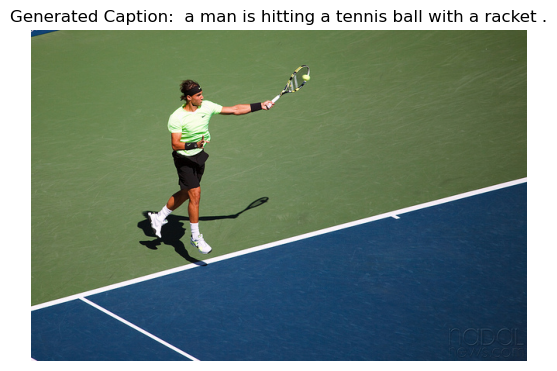

In [6]:
# Load the test image
#test_image_path = "../test.jpg"  
#test_image_path = "../../../Flickr 8k Dataset/RandomImages/R1.jpg"  
test_image_path = "../cocoapi/RandomImages/_Random3.jpg"  
test_image = Image.open(test_image_path).convert("RGB")

# Apply transformations to the test image
transform_test = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

# Preprocess the test image
test_image = transform_test(test_image).unsqueeze(0)  # Add batch dimension

# Move the preprocessed image to the appropriate device
test_image = test_image.to(device)

# Pass the test image through the encoder
with torch.no_grad():
    features = encoder(test_image).unsqueeze(1)

# Generate captions with the decoder
with torch.no_grad():
    output = decoder.sample(features)

# Convert the output into a clean sentence
caption = clean_sentence(output, vocab.idx2word)

# Display the test image with the generated caption
plt.imshow(Image.open(test_image_path))
plt.axis('off')
plt.title('Generated Caption: ' + caption)
plt.show()

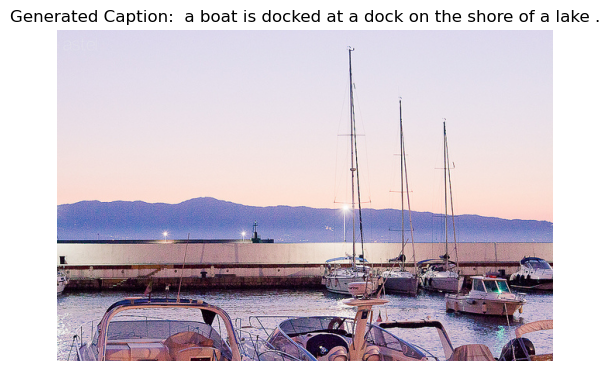

In [7]:
# Load the test image  
test_image_path = "../cocoapi/RandomImages/_Random4.jpg"  
test_image = Image.open(test_image_path).convert("RGB")

# Preprocess the test image
test_image = transform_test(test_image).unsqueeze(0)  # Add batch dimension

# Move the preprocessed image to the appropriate device
test_image = test_image.to(device)

# Pass the test image through the encoder
with torch.no_grad():
    features = encoder(test_image).unsqueeze(1)

# Generate captions with the decoder
with torch.no_grad():
    output = decoder.sample(features)

# Convert the output into a clean sentence
caption = clean_sentence(output, vocab.idx2word)

# Display the test image with the generated caption
plt.imshow(Image.open(test_image_path))
plt.axis('off')
plt.title('Generated Caption: ' + caption)
plt.show()

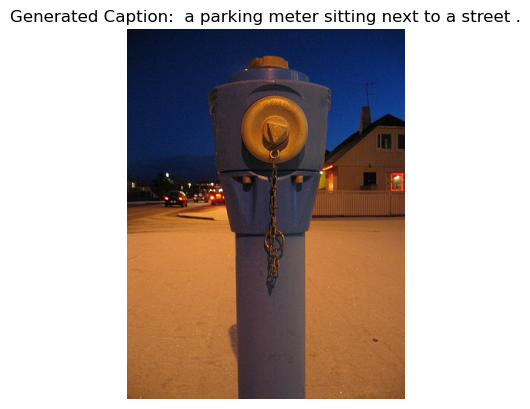

In [8]:
# Load the test image  
test_image_path = "../cocoapi/RandomImages/_Random5.jpg"  
test_image = Image.open(test_image_path).convert("RGB")

# Preprocess the test image
test_image = transform_test(test_image).unsqueeze(0)  # Add batch dimension

# Move the preprocessed image to the appropriate device
test_image = test_image.to(device)

# Pass the test image through the encoder
with torch.no_grad():
    features = encoder(test_image).unsqueeze(1)

# Generate captions with the decoder
with torch.no_grad():
    output = decoder.sample(features)

# Convert the output into a clean sentence
caption = clean_sentence(output, vocab.idx2word)

# Display the test image with the generated caption
plt.imshow(Image.open(test_image_path))
plt.axis('off')
plt.title('Generated Caption: ' + caption)
plt.show()

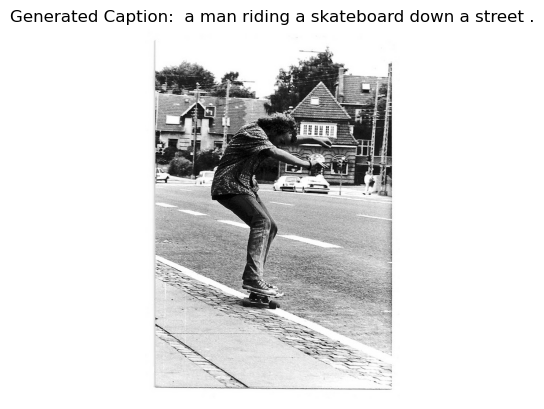

In [9]:
# Load the test image  
test_image_path = "../cocoapi/RandomImages/_Random6.jpg"  
test_image = Image.open(test_image_path).convert("RGB")

# Preprocess the test image
test_image = transform_test(test_image).unsqueeze(0)  # Add batch dimension

# Move the preprocessed image to the appropriate device
test_image = test_image.to(device)

# Pass the test image through the encoder
with torch.no_grad():
    features = encoder(test_image).unsqueeze(1)

# Generate captions with the decoder
with torch.no_grad():
    output = decoder.sample(features)

# Convert the output into a clean sentence
caption = clean_sentence(output, vocab.idx2word)

# Display the test image with the generated caption
plt.imshow(Image.open(test_image_path))
plt.axis('off')
plt.title('Generated Caption: ' + caption)
plt.show()

In [11]:
import json
import nltk
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.meteor_score import meteor_score
from rouge_score import rouge_scorer
import numpy as np
import os
import pickle
from PIL import Image
import torch
from torchvision import transforms
from model import EncoderCNN, DecoderRNN
from nlp_utils import clean_sentence
import pandas as pd
import collections  # Import collections
import random

# Ensure you have the necessary NLTK data files
nltk.download('punkt')

# Function to preprocess the image
def preprocess_image(image_path):
    transform_test = transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ])
    image = Image.open(image_path).convert("RGB")
    image = transform_test(image).unsqueeze(0)  # Add batch dimension
    image = image.to(device)
    return image

# Function to generate captions for an image
def generate_cnn_rnn_caption(image_path):
    image = preprocess_image(image_path)
    with torch.no_grad():
        features = encoder(image).unsqueeze(1)
        output = decoder.sample(features)
    caption = clean_sentence(output, vocab.idx2word)
    return caption

# Function to calculate METEOR score
def calculate_meteor(references, candidates):
    meteor_scores = []
    for ref, cand in zip(references, candidates):
        meteor_scores.append(meteor_score(ref, cand))
    return np.mean(meteor_scores)

# Load captions from the JSON file (assuming COCO dataset)
with open('../cocoapi/annotations/captions_train2017.json', 'r') as file:
    annotation_data = json.load(file)

# Create a DataFrame
captions_df = pd.DataFrame(annotation_data['annotations'])

# Update image paths
captions_df['image_path'] = captions_df['image_id'].apply(lambda x: f'../cocoapi/images/train2017/{x:012d}.jpg')

def preprocess_caption(text):
    text = text.lower()
    text = text.replace('[start]', '').replace('[end]', '')
    text = text.strip()
    return text

captions_df['caption'] = captions_df['caption'].apply(preprocess_caption)

# Split the data into training and validation sets
image_caption_map = collections.defaultdict(list)
for image_path, caption in zip(captions_df['image_path'], captions_df['caption']):
    image_caption_map[image_path].append(caption)

image_paths = list(image_caption_map.keys())
random.shuffle(image_paths)

split_index = int(len(image_paths) * 0.8)
train_image_paths, val_image_paths = image_paths[:split_index], image_paths[split_index:]

val_images = []
val_captions = []
for val_image_path in val_image_paths:
    captions_count = len(image_caption_map[val_image_path])
    val_images.extend([val_image_path] * captions_count)
    val_captions.extend(image_caption_map[val_image_path])

# Function to evaluate the model
def evaluate_cnn_rnn_model(model, val_images, captions_df, num_samples=1000):
    references = []
    candidates = []

    sample_indices = np.random.choice(len(val_images), num_samples, replace=False)

    for index in sample_indices:
        image_path = val_images[index]
        original_captions = captions_df[captions_df['image_path'] == image_path]['caption'].values
        original_captions = [caption.replace('[start] ', '').replace(' [end]', '') for caption in original_captions]
        
        generated_caption = generate_cnn_rnn_caption(image_path)

        # Tokenize the captions
        references.append([nltk.word_tokenize(caption) for caption in original_captions])
        candidates.append(nltk.word_tokenize(generated_caption))

    # Calculate BLEU scores
    bleu_1 = corpus_bleu(references, candidates, weights=(1, 0, 0, 0))
    bleu_2 = corpus_bleu(references, candidates, weights=(0.5, 0.5, 0, 0))
    bleu_3 = corpus_bleu(references, candidates, weights=(0.33, 0.33, 0.33, 0))
    bleu_4 = corpus_bleu(references, candidates, weights=(0.25, 0.25, 0.25, 0.25))

    # Calculate METEOR score
    meteor = calculate_meteor(references, candidates)

    # Calculate ROUGE scores
    rouge = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
    rouge_scores = [rouge.score(" ".join(reference[0]), " ".join(candidate)) for reference, candidate in zip(references, candidates)]
    rouge_L = np.mean([score['rougeL'].fmeasure for score in rouge_scores])

    # Print the evaluation results
    print(f'BLEU-1: {bleu_1:.4f}')
    print(f'BLEU-2: {bleu_2:.4f}')
    print(f'BLEU-3: {bleu_3:.4f}')
    print(f'BLEU-4: {bleu_4:.4f}')
    print(f'METEOR: {meteor:.4f}')
    print(f'ROUGE-L: {rouge_L:.4f}')

# Evaluate the model on the validation dataset
evaluate_cnn_rnn_model(decoder, val_images, captions_df)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rkarm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


BLEU-1: 0.6849
BLEU-2: 0.4750
BLEU-3: 0.3283
BLEU-4: 0.2218
METEOR: 0.4405
ROUGE-L: 0.3500
